In [164]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# from keras import optimizers

In [342]:
facialpoints_df = pd.read_csv('training.csv')

In [343]:
facialpoints_df.dropna(inplace=True)
facialpoints_df.reset_index(inplace=True, drop=True)
facialpoints_df

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...
5,69.680748,39.968748,29.183551,37.563364,62.864299,40.169271,76.898243,41.171888,36.401047,39.367626,...,58.800000,64.869084,82.471178,31.990430,81.669084,49.308112,78.487626,49.432374,93.898766,167 169 170 167 156 145 106 68 52 24 20 15 21 ...
6,64.131866,34.290040,29.578953,33.138040,57.797154,35.154040,69.026577,34.290040,34.761664,33.714040,...,53.006174,55.781799,70.570953,33.898309,70.282953,45.127732,65.099597,45.415732,78.057020,109 109 125 141 145 139 120 81 45 34 31 35 36 ...
7,67.468893,39.413452,29.355961,39.621717,59.554951,40.454773,75.591612,40.038245,37.478214,40.454773,...,56.907961,66.843961,80.025786,30.189204,81.275184,48.100194,71.278602,48.516816,91.063922,178 177 178 179 179 179 181 185 188 184 192 20...
8,65.802880,34.755200,27.475840,36.185600,58.652160,37.329280,72.952960,35.899520,36.342400,37.043200,...,55.348480,65.516800,73.368320,31.194240,74.798080,49.213440,67.648000,49.499520,83.093120,164 158 118 76 66 69 59 53 43 31 35 41 45 55 6...
9,64.121231,36.740308,29.468923,38.390154,58.620923,37.840615,71.272000,37.290338,36.344615,39.490462,...,54.341538,65.771692,69.192615,32.769231,72.217846,49.270154,67.542769,49.545231,76.893538,226 227 225 224 221 220 215 210 210 208 206 18...


In [344]:
facialpoints_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 31 columns):
left_eye_center_x            2140 non-null float64
left_eye_center_y            2140 non-null float64
right_eye_center_x           2140 non-null float64
right_eye_center_y           2140 non-null float64
left_eye_inner_corner_x      2140 non-null float64
left_eye_inner_corner_y      2140 non-null float64
left_eye_outer_corner_x      2140 non-null float64
left_eye_outer_corner_y      2140 non-null float64
right_eye_inner_corner_x     2140 non-null float64
right_eye_inner_corner_y     2140 non-null float64
right_eye_outer_corner_x     2140 non-null float64
right_eye_outer_corner_y     2140 non-null float64
left_eyebrow_inner_end_x     2140 non-null float64
left_eyebrow_inner_end_y     2140 non-null float64
left_eyebrow_outer_end_x     2140 non-null float64
left_eyebrow_outer_end_y     2140 non-null float64
right_eyebrow_inner_end_x    2140 non-null float64
right_eyebrow_inner_end_y 

In [345]:
facialpoints_df['Image'][1]

'219 215 204 196 204 211 212 200 180 168 178 196 194 196 203 209 199 192 197 201 207 215 199 190 182 180 183 190 190 176 175 175 170 158 162 170 150 133 133 128 121 115 115 114 112 114 113 112 120 127 123 118 112 109 112 110 107 106 104 104 100 98 105 122 135 143 152 135 114 104 81 74 87 107 98 82 84 79 70 69 62 62 79 94 97 100 98 93 100 100 97 96 93 92 88 84 222 219 220 211 207 199 185 178 171 175 196 199 199 200 201 205 202 200 204 206 211 219 204 192 188 185 185 193 189 180 177 178 173 158 159 162 145 133 133 129 122 118 116 115 114 115 115 118 127 132 127 120 116 119 118 114 114 113 110 108 105 104 110 130 140 149 152 128 106 106 91 78 90 107 101 84 90 93 79 75 73 59 58 74 94 102 100 99 97 90 94 96 95 92 88 86 231 224 212 197 191 186 176 170 172 190 201 199 200 203 204 210 215 211 210 213 213 217 210 192 188 188 189 194 189 183 181 183 175 158 158 158 142 132 133 131 125 120 121 120 116 115 116 122 135 137 129 122 121 125 121 119 120 118 117 112 112 109 116 136 149 156 149 126 109 

In [346]:
facialpoints_df['Image'] = facialpoints_df['Image'].apply(lambda x: np.fromstring(x, dtype = int, sep = ' ').reshape(96,96))

In [347]:
facialpoints_df['Image'][1].shape

(96, 96)

In [348]:
facialpoints_df.isnull().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64

In [349]:
facialpoints_df.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,...,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000
mean,66.221549,36.842274,29.640269,37.063815,59.272128,37.856014,73.412473,37.640110,36.603107,37.920852,...,47.952141,57.253926,63.419076,75.887660,32.967365,76.134065,48.081325,72.681125,48.149654,82.630412
std,2.087683,2.294027,2.051575,2.234334,2.005631,2.034500,2.701639,2.684162,1.822784,2.009505,...,3.276053,4.528635,3.650131,4.438565,3.595103,4.259514,2.723274,5.108675,3.032389,4.813557
min,47.835757,23.832996,18.922611,24.773072,41.779381,27.190098,52.947144,26.250023,24.112624,26.250023,...,24.472590,41.558400,43.869480,57.023258,9.778137,56.690208,32.260312,56.719043,33.047605,57.232296
25%,65.046300,35.468842,28.472224,35.818377,58.113054,36.607950,71.741978,36.102409,35.495730,36.766783,...,46.495330,54.466000,61.341291,72.874263,30.879288,73.280038,46.580004,69.271669,46.492000,79.417480
50%,66.129065,36.913319,29.655440,37.048085,59.327154,37.845220,73.240045,37.624207,36.620735,37.920336,...,47.900511,57.638582,63.199057,75.682465,33.034022,75.941985,47.939031,72.395978,47.980854,82.388899
75%,67.332093,38.286438,30.858673,38.333884,60.521492,39.195431,74.978684,39.308331,37.665280,39.143921,...,49.260657,60.303524,65.302398,78.774969,35.063575,78.884031,49.290000,75.840286,49.551936,85.697976
max,78.013082,46.132421,42.495172,45.980981,69.023030,47.190316,87.032252,49.653825,47.293746,44.887301,...,65.279654,75.992731,84.767123,94.673637,50.973348,93.443176,61.804506,93.916338,62.438095,95.808983


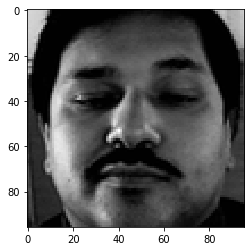

In [350]:
#Plot a random image from the dataset
i = np.random.randint(1, len(facialpoints_df))
plt.imshow(facialpoints_df['Image'][i], cmap='gray')

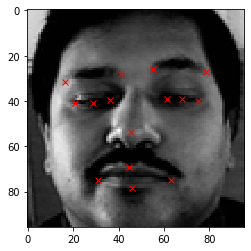

In [351]:
'''
The (x, y) coordinates for the 15 key features are plotted in top of the image
below is a for loop starting from index = 1 to 32 with step of 2
In teh first iteration j would be 1 followed by 3 and so on
Since the x coordinates are in even columns like 0,2,4,6,... any coordinates are in odd columns like 1,3,5,...
we access their value using the .loc command, which get the vales for the coordinates of the image based on
in the first iteration of df[i][j-1] would be df[i][0] refering to the value in the 1st column(x-coordinate)
'''

plt.figure()
plt.imshow(facialpoints_df['Image'][i], cmap='gray')
for j in range(1,31,2):
    plt.plot(facialpoints_df.loc[i][j-1], facialpoints_df.loc[i][j], 'rx')

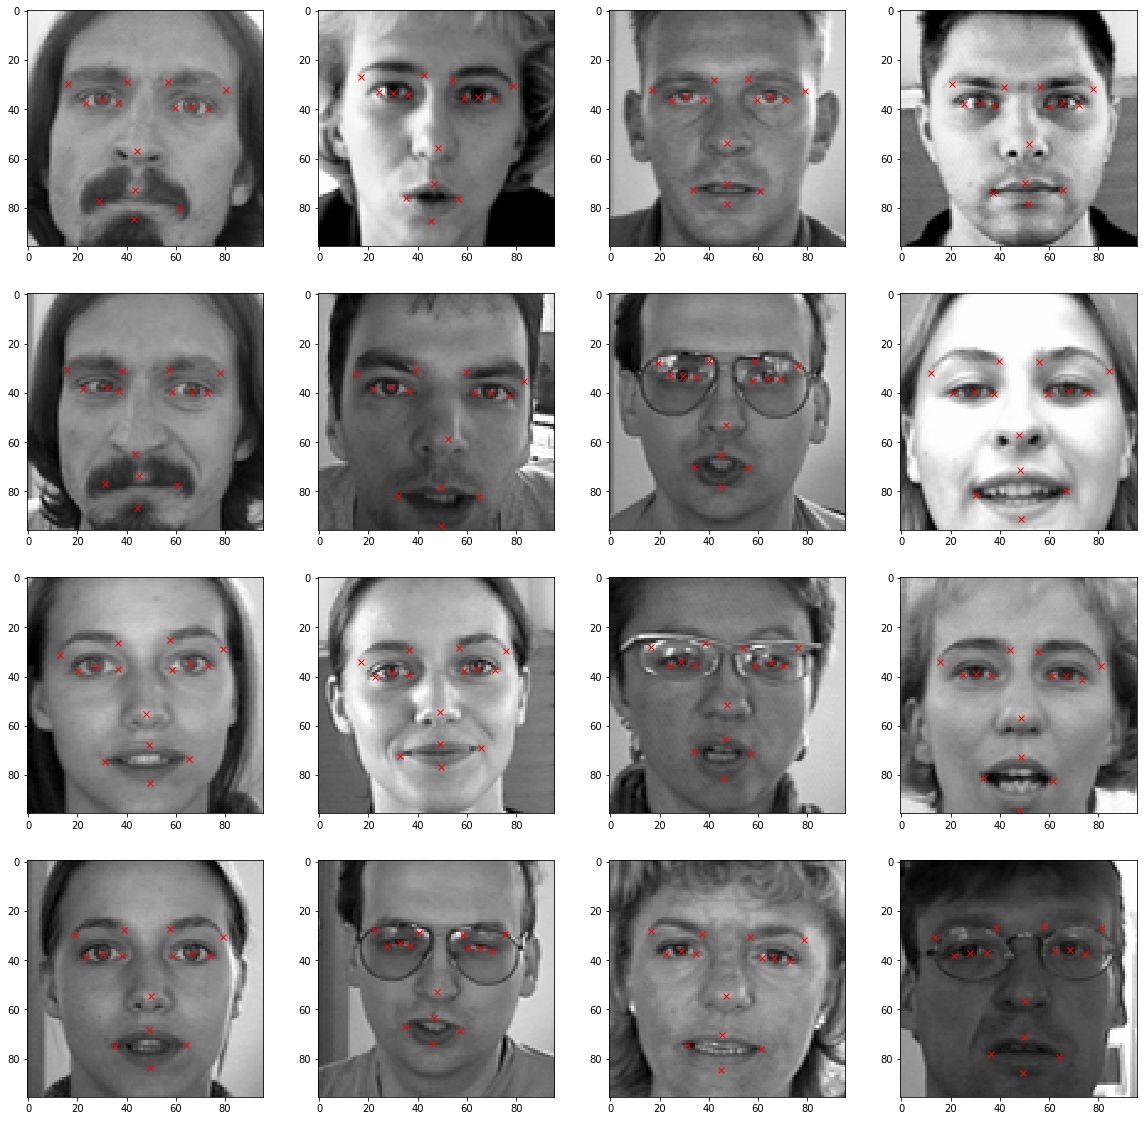

In [352]:
import random

# Let's view more images in a grid format
fig = plt.figure(figsize=(20,20))

for i in range(16):
    ax = fig.add_subplot(4,4, i + 1)
    image = plt.imshow(facialpoints_df['Image'][i], cmap = 'gray')
    for j in range(1,31,2):
        plt.plot(facialpoints_df.loc[i][j-1], facialpoints_df.loc[i][j], 'rx')
        

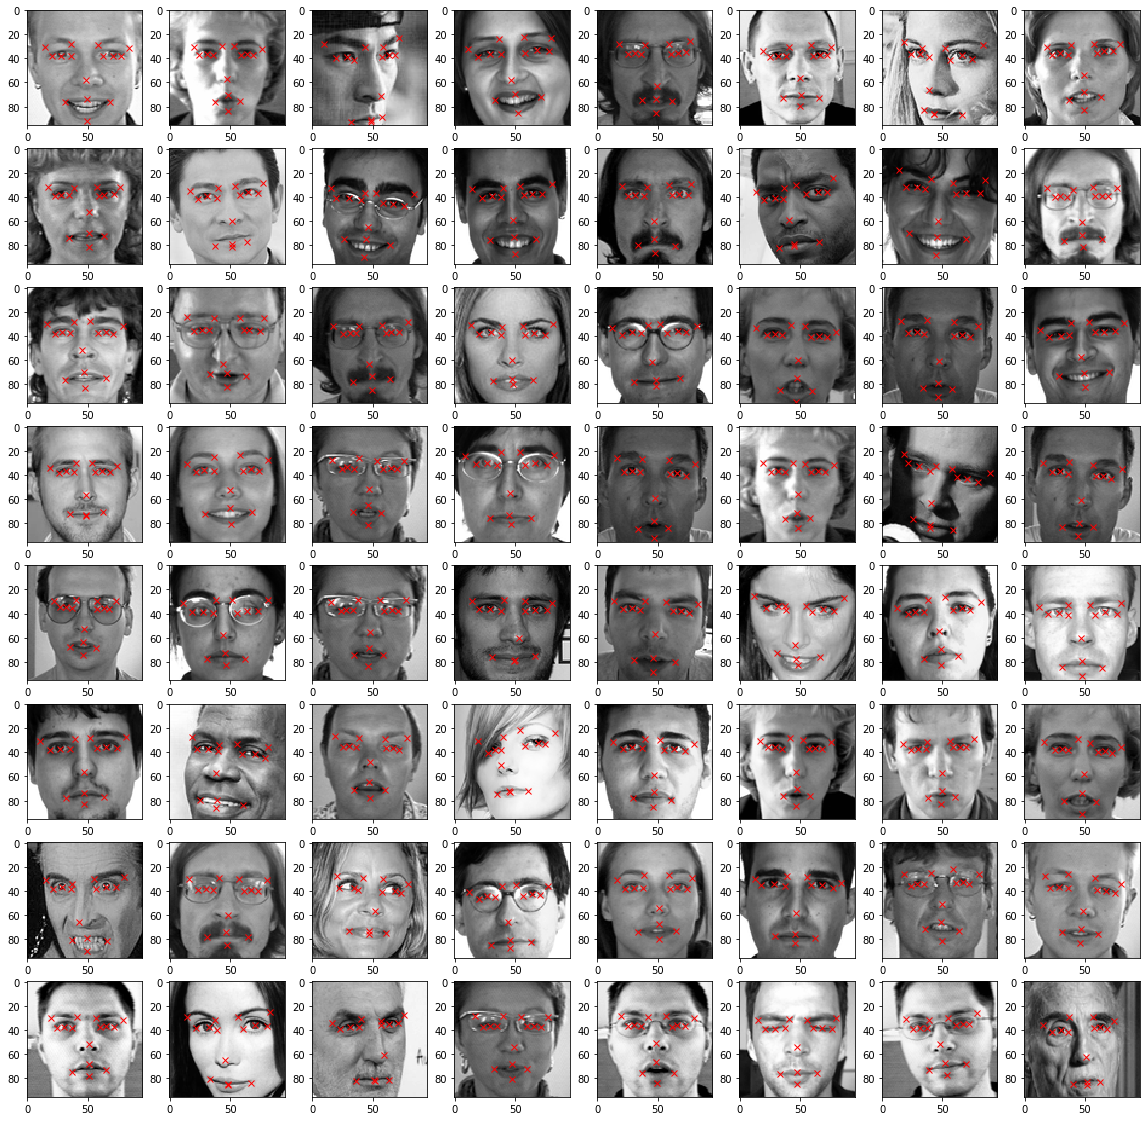

In [353]:
import random

# Let's view more images in a grid format
fig = plt.figure(figsize=(20,20))

for i in range(64):
    img = np.random.randint(1, len(facialpoints_df))
    ax = fig.add_subplot(8,8, i + 1)
    image = plt.imshow(facialpoints_df['Image'][img], cmap = 'gray')
    for j in range(1,31,2):
        plt.plot(facialpoints_df.loc[img][j-1], facialpoints_df.loc[img][j], 'rx')

In [354]:
# IMAGE AUGMENTATION
#Create a new copy
import copy
facialpoints_df_copy = copy.copy(facialpoints_df)

In [355]:
#Obtain the header of the Datadram (Names of columns)

columns = facialpoints_df_copy.columns[:-1]
columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y'],
      dtype='object')

In [356]:
#Taking a look at the pixel values of a sample image to see if it makes sense
facialpoints_df['Image'][0]

array([[238, 236, 237, ..., 250, 250, 250],
       [235, 238, 236, ..., 249, 250, 251],
       [237, 236, 237, ..., 251, 251, 250],
       ...,
       [186, 183, 181, ...,  52,  57,  60],
       [189, 188, 207, ...,  61,  69,  78],
       [191, 184, 184, ...,  70,  75,  90]])

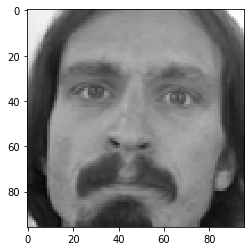

In [357]:
plt.imshow(facialpoints_df['Image'][0], cmap='gray')

In [358]:
#Flip the pictures horizontally
facialpoints_df_copy['Image'] = facialpoints_df_copy['Image'].apply(lambda x: np.flip(x, axis = 1))

In [359]:
#Checking the pixel values to confirm
facialpoints_df_copy['Image'][0]

array([[250, 250, 250, ..., 237, 236, 238],
       [251, 250, 249, ..., 236, 238, 235],
       [250, 251, 251, ..., 237, 236, 237],
       ...,
       [ 60,  57,  52, ..., 181, 183, 186],
       [ 78,  69,  61, ..., 207, 188, 189],
       [ 90,  75,  70, ..., 184, 184, 191]])

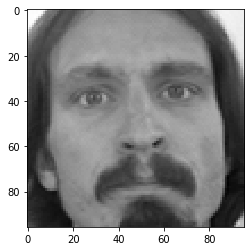

In [360]:
#Checking the picture
plt.imshow(facialpoints_df_copy['Image'][0], cmap='gray')

In [361]:
#Since we are flipping the images horizontally, the y-coordinates remain the same
#X-coordinates need to change. We can do this by subttracting initial x-coordinate from the width 96
for i in range (1,31,2):
    if i%2 == 0:
        facialpoints_df_copy[columns[i]] = facialpoints_df_copy[columns[i]].apply(lambda x: 96. - float(x) )

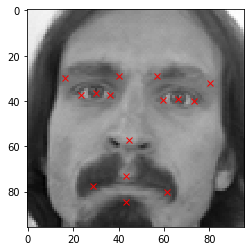

In [362]:
#View the original image
plt.imshow(facialpoints_df['Image'][0], cmap='gray')
for j in range (1,31,2):
    plt.plot(facialpoints_df.loc[0][j-1], facialpoints_df.loc[0][j], 'rx')

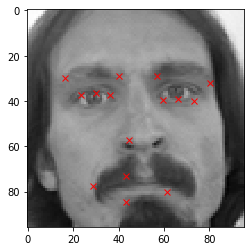

In [363]:
#View the Horizontally flipped image
plt.imshow(facialpoints_df_copy['Image'][0], cmap='gray')
for j in range (1,31,2):
    plt.plot(facialpoints_df_copy.loc[0][j-1], facialpoints_df_copy.loc[0][j], 'rx')

In [364]:
facialpoints_df_augmented = np.concatenate((facialpoints_df, facialpoints_df_copy))

In [365]:
facialpoints_df_augmented.shape

(4280, 31)

In [366]:
# Another augmentation by randomly increasing brightness
# We multiply the pixel values by random values between 1 and 2 to increase the brightness of the image
# We clip the value between 0 and 255

import random

facialpoints_df_copy = copy.copy(facialpoints_df)
facialpoints_df_copy['Image'] = facialpoints_df['Image'].apply(lambda x: np.clip(random.uniform(1,2) * x, 0.0, 255.0))
facialpoints_df_augmented = np.concatenate((facialpoints_df_augmented, facialpoints_df_copy))
facialpoints_df_augmented.shape

(6420, 31)

In [367]:
#Try flipping vertically
import copy
facialpoints_df_copy = copy.copy(facialpoints_df)
facialpoints_df_copy['Image'] = facialpoints_df_copy['Image'].apply(lambda x: np.flip(x, axis = 0))

#Since we are flipping the images vertically, the x-coordinates remain the same
#Y-coordinates need to change. We can do this by subttracting initial x-coordinate from the width 96
for i in range(1,31,2):
    if i%2 == 1:
        
        facialpoints_df_copy[columns[i]] = facialpoints_df_copy[columns[i]].apply(lambda x: 96. - float(x) )


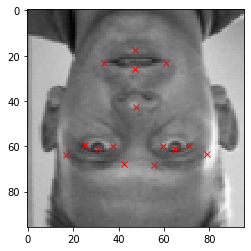

In [368]:
#Checking the picture
plt.imshow(facialpoints_df_copy['Image'][2], cmap='gray')
for j in range(1,31,2):
    plt.plot(facialpoints_df_copy.loc[2][j-1], facialpoints_df_copy.loc[2][j], 'rx')#facialpoints_df_copy = copy.copy(facialpoints_df)
    
#facialpoints_df_augmented = np.concatenate((facialpoints_df_augmented, facialpoints_df_copy))
#facialpoints_df_augmented.shape

In [369]:
# Preparing for Normalization for the training set
img = facialpoints_df_augmented[:, 30]
img = img/255

#Create and empty array of shape 
X = np.empty((len(img), 96, 96, 1))

#Iterate through the normalized image list and add values to the empty array
#Note that we need to expand it's dimension from (96,96) to (96,96,1)
for i in range(len(img)):
    X[i,] = np.expand_dims(img[i], axis= 2)
    
#Convert the array to float32
X = np.asarray(X).astype(np.float32)
X.shape

(6420, 96, 96, 1)

In [370]:
y = facialpoints_df_augmented[:,:30]
y = np.asarray(y).astype(np.float32)
y.shape

(6420, 30)

In [371]:
#Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

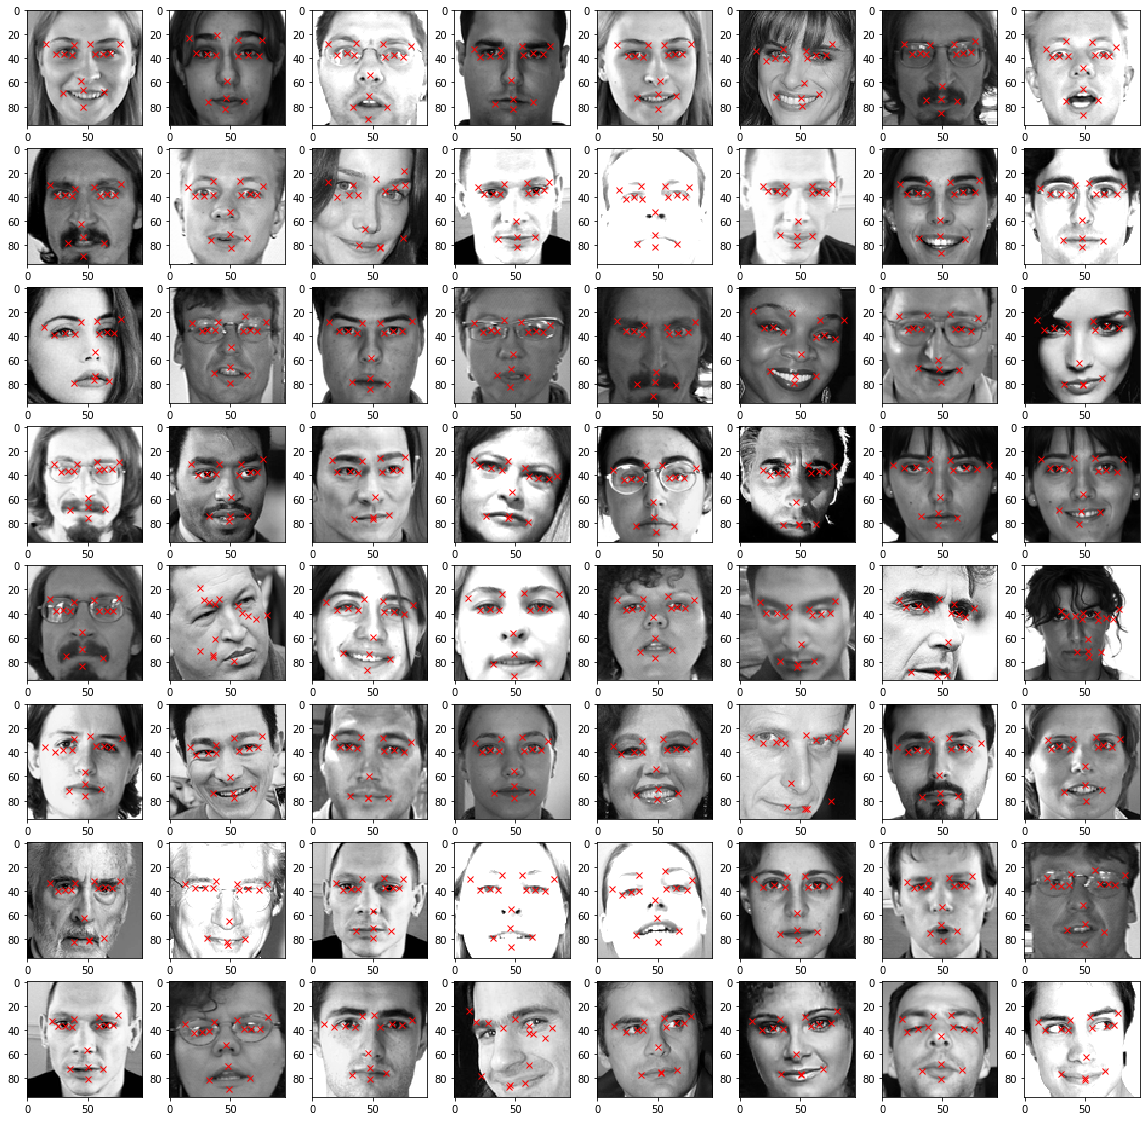

In [372]:

fig = plt.figure(figsize=(20,20))

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1)
    image = plt.imshow(X_train[i].reshape(96,96), cmap = 'gray')
    for j in range(1,31,2):
        plt.plot(y_train[i][j-1], y_train[i][j], 'rx')

In [378]:
# Building the convulational neural network
def res_block(X, filter, stage):
    
    #CONVULATIONAL BLOCK
    X_copy = X
    f1, f2, f3 = filter
    
    #Main path
    X = Conv2D(f1, (1,1), strides = (1,1), name = 'res_'+str(stage)+'_conv_a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = MaxPool2D((2,2))(X)
    X = BatchNormalization(axis=3, name= 'bn_'+str(stage)+'_conv_a')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(f2, kernel_size = (3,3), strides=(1,1), padding='same', name = 'res_'+str(stage)+'_conv_b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name= 'bn_'+str(stage)+'_conv_b')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(f3, kernel_size = (1,1), strides=(1,1), name = 'res_'+str(stage)+'_conv_c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name= 'bn_'+str(stage)+'_conv_c')(X)
    
    # Short Path
    X_copy = Conv2D(f3, kernel_size = (1,1), strides=(1,1), name = 'res_'+str(stage)+'_conv_copy', kernel_initializer=glorot_uniform(seed=0))(X_copy)
    X_copy = MaxPool2D((2,2))(X_copy)
    X_copy = BatchNormalization(axis=3, name= 'bn_'+str(stage)+'_conv_copy')(X_copy)
    
    #Add data from main and short paths
    X = Add()([X, X_copy])
    X = Activation('relu')(X)
    
    
    #Identity block 1
    X_copy = X
    
    #Main Path
    X = Conv2D(f1, (1,1), strides = (1,1), name = 'res_'+str(stage)+'_identity_1_a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name= 'bn_'+str(stage)+'_identity_1_a')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(f2, kernel_size = (3,3), strides=(1,1), padding='same', name = 'res_'+str(stage)+'_identity_1_b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name= 'bn_'+str(stage)+'_identity_1_b')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(f3, kernel_size = (1,1), strides=(1,1), name = 'res_'+str(stage)+'_identity_1_c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name= 'bn_'+str(stage)+'_identity_1_c')(X)
    
    
    #Add both paths together (Note that we feed the original input as is hence the name identity)
    X = Add()([X, X_copy])
    X = Activation('relu')(X)
    
    
    #Identity block 2
    X_copy = X
    
    #Main Path
    X = Conv2D(f1, (1,1), strides = (1,1), name = 'res_'+str(stage)+'_identity_2_a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name= 'bn_'+str(stage)+'_identity_2_a')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(f2, kernel_size = (3,3), strides=(1,1), padding='same', name = 'res_'+str(stage)+'_identity_2_b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name= 'bn_'+str(stage)+'_identity_2_b')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(f3, kernel_size = (1,1), strides=(1,1), name = 'res_'+str(stage)+'_identity_2_c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name= 'bn_'+str(stage)+'_identity_2_c')(X)
    
    
    #Add data from main and short paths
    X = Add()([X, X_copy])
    X = Activation('relu')(X)
    
    return X
    
    
    

In [380]:
input_shape = (96, 96, 1)
 
# Input Tensor shape
X_input = Input(input_shape)

# Zero-padding
X = ZeroPadding2D((3,3))(X_input)

# Stage 1
X = Conv2D(64, (7,7), strides= (2,2), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPool2D((3,3), strides=(2,2))(X)

# Stage 2
X = res_block(X, filter= [64,64,256], stage= 2)

# Stage 3
X = res_block(X, filter= [128,128, 512], stage= 3)

# Stage 4
X = res_block(X, filter= [256,256, 1024], stage= 4)

# Average Pooling
X = AveragePooling2D((2,2), name = 'Averagea_Pooling')(X)

# Final Layer
X = Flatten()(X)
X = Dense(4096, activation= 'relu')(X)
X = Dropout(0.2)(X)
X = Dense(2048, activation= 'relu')(X)
X = Dropout(0.1)(X)
X = Dense(30, activation='relu')(X)

model = Model( inputs= X_input, outputs = X)
model.summary()




Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 96, 96, 1)]  0                                            
__________________________________________________________________________________________________
zero_padding2d_3 (ZeroPadding2D (None, 102, 102, 1)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 48, 48, 64)   3200        zero_padding2d_3[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 48, 48, 64)   256         conv1[0][0]                      
____________________________________________________________________________________________

In [384]:
#COMPILING AND TRAINING LEARNING MODEL
adam = tf.keras.optimizers.Adam(lr = 0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='mean_squared_error', optimizer= adam, metrics=['accuracy'])

In [385]:
# Save the best model with leasr validation loss
Checkpointer = ModelCheckpoint(filepath= "weights.hdf5", verbose= 1, save_best_only= True)

In [386]:
history = model.fit(X_train, y_train, batch_size = 256, epochs = 100, validation_split= 0.05, callbacks=[Checkpointer])

Epoch 1/100
22/22 [==============================] - ETA: 0s - loss: 322.9597 - accuracy: 0.3170
Epoch 00001: val_loss improved from inf to 2095.56665, saving model to weights.hdf5
22/22 [==============================] - 133s 6s/step - loss: 322.9597 - accuracy: 0.3170 - val_loss: 2095.5667 - val_accuracy: 0.7163
Epoch 2/100
22/22 [==============================] - ETA: 0s - loss: 23.0049 - accuracy: 0.5021
Epoch 00002: val_loss improved from 2095.56665 to 1544.13757, saving model to weights.hdf5
22/22 [==============================] - 133s 6s/step - loss: 23.0049 - accuracy: 0.5021 - val_loss: 1544.1376 - val_accuracy: 0.7163
Epoch 3/100
22/22 [==============================] - ETA: 0s - loss: 16.8844 - accuracy: 0.6087
Epoch 00003: val_loss improved from 1544.13757 to 1111.76624, saving model to weights.hdf5
22/22 [==============================] - 132s 6s/step - loss: 16.8844 - accuracy: 0.6087 - val_loss: 1111.7662 - val_accuracy: 0.7163
Epoch 4/100
22/22 [=======================

Epoch 28/100
22/22 [==============================] - ETA: 0s - loss: 7.0634 - accuracy: 0.7242
Epoch 00028: val_loss did not improve from 7.81617
22/22 [==============================] - 123s 6s/step - loss: 7.0634 - accuracy: 0.7242 - val_loss: 7.8310 - val_accuracy: 0.7405
Epoch 29/100
22/22 [==============================] - ETA: 0s - loss: 6.7376 - accuracy: 0.7340
Epoch 00029: val_loss improved from 7.81617 to 6.66058, saving model to weights.hdf5
22/22 [==============================] - 127s 6s/step - loss: 6.7376 - accuracy: 0.7340 - val_loss: 6.6606 - val_accuracy: 0.7439
Epoch 30/100
22/22 [==============================] - ETA: 0s - loss: 6.8004 - accuracy: 0.7311
Epoch 00030: val_loss did not improve from 6.66058
22/22 [==============================] - 140s 6s/step - loss: 6.8004 - accuracy: 0.7311 - val_loss: 15.9273 - val_accuracy: 0.7336
Epoch 31/100
22/22 [==============================] - ETA: 0s - loss: 7.0374 - accuracy: 0.7295
Epoch 00031: val_loss improved from 6.

Epoch 57/100
22/22 [==============================] - ETA: 0s - loss: 5.6543 - accuracy: 0.7958
Epoch 00057: val_loss did not improve from 4.17864
22/22 [==============================] - 116s 5s/step - loss: 5.6543 - accuracy: 0.7958 - val_loss: 4.6023 - val_accuracy: 0.7751
Epoch 58/100
22/22 [==============================] - ETA: 0s - loss: 5.1472 - accuracy: 0.7919
Epoch 00058: val_loss did not improve from 4.17864
22/22 [==============================] - 118s 5s/step - loss: 5.1472 - accuracy: 0.7919 - val_loss: 5.4450 - val_accuracy: 0.7785
Epoch 59/100
22/22 [==============================] - ETA: 0s - loss: 4.4248 - accuracy: 0.7929
Epoch 00059: val_loss did not improve from 4.17864
22/22 [==============================] - 116s 5s/step - loss: 4.4248 - accuracy: 0.7929 - val_loss: 4.2983 - val_accuracy: 0.7716
Epoch 60/100
22/22 [==============================] - ETA: 0s - loss: 5.0311 - accuracy: 0.7981
Epoch 00060: val_loss did not improve from 4.17864
22/22 [===============

22/22 [==============================] - ETA: 0s - loss: 6.1688 - accuracy: 0.8287
Epoch 00086: val_loss did not improve from 4.02738
22/22 [==============================] - 121s 6s/step - loss: 6.1688 - accuracy: 0.8287 - val_loss: 13.7658 - val_accuracy: 0.7924
Epoch 87/100
22/22 [==============================] - ETA: 0s - loss: 6.5545 - accuracy: 0.8167
Epoch 00087: val_loss did not improve from 4.02738
22/22 [==============================] - 121s 6s/step - loss: 6.5545 - accuracy: 0.8167 - val_loss: 13.7114 - val_accuracy: 0.7785
Epoch 88/100
22/22 [==============================] - ETA: 0s - loss: 5.1994 - accuracy: 0.8147
Epoch 00088: val_loss did not improve from 4.02738
22/22 [==============================] - 120s 5s/step - loss: 5.1994 - accuracy: 0.8147 - val_loss: 4.0922 - val_accuracy: 0.7716
Epoch 89/100
22/22 [==============================] - ETA: 0s - loss: 4.7510 - accuracy: 0.8264
Epoch 00089: val_loss did not improve from 4.02738
22/22 [==========================

In [387]:
# Save Trained Model
model_json = model.to_json()
with open('KeyPointDetector.json', 'w') as json_file:
    json_file.write(model_json)

In [389]:
#Assessing Trained model performance
with open('KeyPointDetector.json', 'r') as json_file:
    json_SavedModel = json_file.read()
model = tf.keras.models.model_from_json(json_SavedModel)
model.load_weights('weights.hdf5')
model.compile(loss='mean_squared_error', optimizer = adam, metrics = ['accuracy'])

In [390]:
result = model.evaluate(X_test, y_test)
print("Accuracy : {}".format(result[1]))

21/21 [==============================] - 3s 126ms/step - loss: 3.7450 - accuracy: 0.8022
Accuracy : 0.8021807074546814


In [391]:
#Make prediction using teh testing dataset
df_predict = model.predict(X_test)

In [392]:
# Print the rmse loss values

from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, df_predict))
print("RMSE Value : {}".format(rms))

RMSE Value : 1.9352042840964627


In [394]:
df_predict = pd.DataFrame(df_predict, columns = columns)
df_predict.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,64.652618,38.590622,31.755486,39.598537,58.048954,39.763477,70.801826,39.273575,37.983486,40.545788,...,46.928970,55.216476,63.667973,76.751984,33.613712,77.269745,47.784286,72.855705,48.188976,82.120468
1,68.479149,36.257256,31.285213,35.695461,62.079441,36.942562,74.642174,37.087685,37.884651,36.571735,...,51.022484,50.542435,64.848862,72.868980,34.221195,72.540794,49.600876,66.731483,49.650280,80.952362
2,69.571091,33.801846,29.505173,35.265614,63.338352,34.726265,76.037781,34.601440,36.474632,35.588139,...,51.037483,50.310883,67.929008,73.262863,35.952831,73.878609,51.249146,66.374939,51.959881,83.934311
3,66.338188,39.127617,29.655735,37.607109,58.510605,39.950527,74.660545,40.082848,37.987389,39.259377,...,48.654266,60.016960,65.345604,77.411209,28.010658,76.420662,46.919483,74.808929,46.755394,86.482628
4,65.623276,37.220055,30.832378,36.186779,59.964153,37.744709,71.436790,38.121719,36.699223,36.896732,...,47.742386,55.494331,61.298710,70.914978,33.658993,70.033081,47.289909,65.417473,47.196846,79.119934


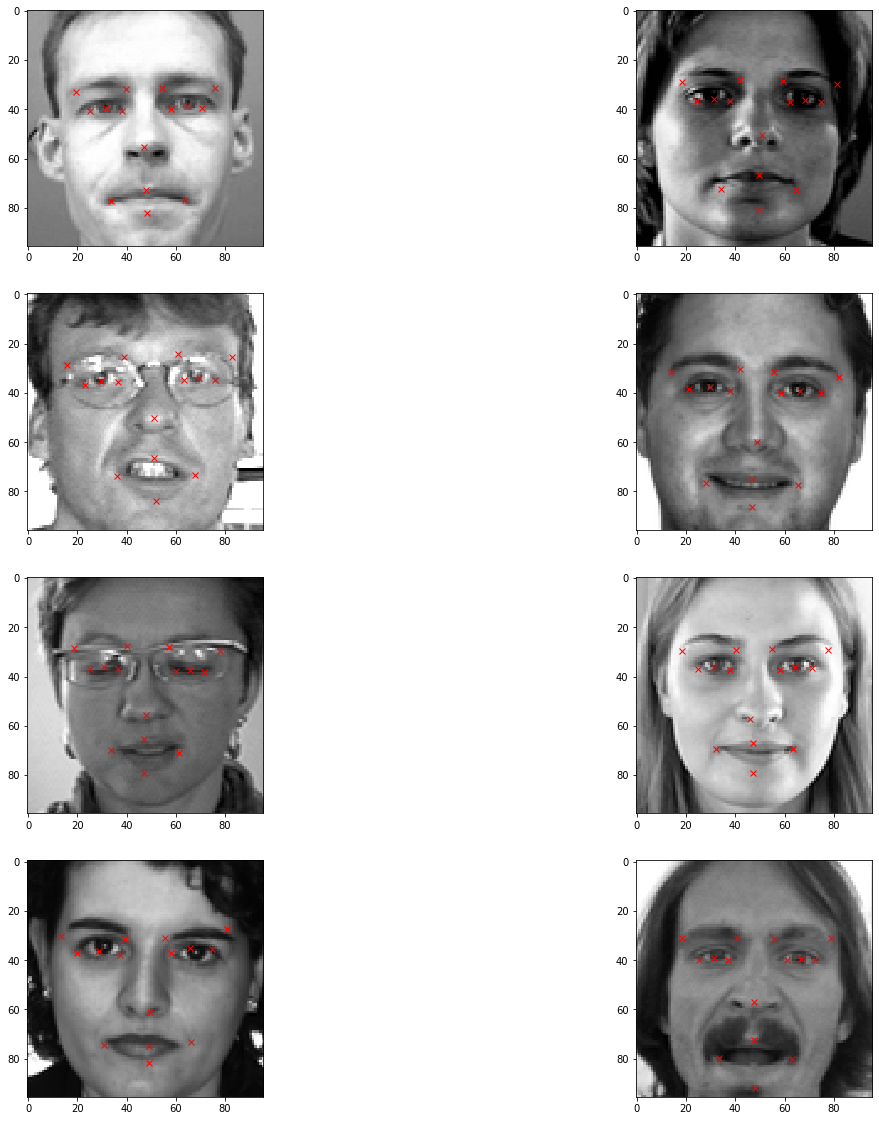

In [395]:
fig = plt.figure(figsize = (20,20))

for i in range(8):
    ax = fig.add_subplot(4, 2, i +1)
    # Using squeeze to convert the image shape from (96,96,1) to (96,96)
    plt.imshow(X_test[i].squeeze(), cmap='gray')
    for j in range(1,31,2):
        plt.plot(df_predict.loc[i][j-1], df_predict.loc[i][j], 'rx')